### Phase accumulation in CZ gates

CZ gate mapping:

$$|00> \to |00> $$
$$ |01> \to |01> e^{i \phi} $$
$$ |10> \to |10> e^{i \phi} $$
$$ |11> \to |11> e^{(2 \phi - \pi)} $$

Total accumulated phases for $|01>$ and $|11>$:
$$\phi_{01} = 2\pi(1+\frac{\Delta}{\sqrt{\Delta^2 + \Omega^2}}) + 2k_1\pi, $$
$$\phi_{11} = 2\pi(\frac{2\Delta}{\sqrt{\Delta^2 + 2\Omega^2}}) + 2k_2\pi. $$

Intersection coordinates: Delta/Omega = 0.4, Phase = 4.5 radians


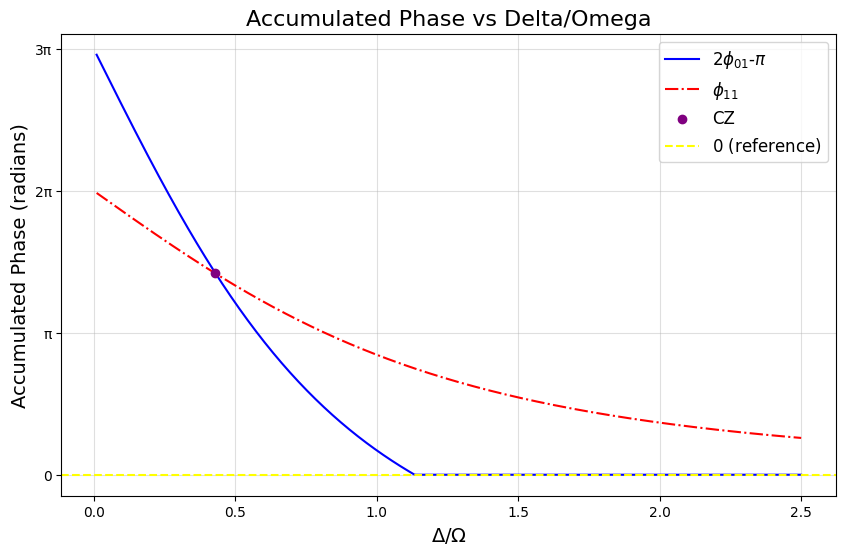

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
pi = np.pi
theta = pi  
# 01> and |11> travel different trajectories on the Bloch sphere
# state |11> returns to its initial position after the first pulse
k1 = 2 
k2 = 1 
Omega = 2 * pi * 3.5*1e06   # Arbitrary value for Omega

Delta_Omega = np.linspace(0.01, 2.5, 500)
Delta = Delta_Omega * Omega
Omegabar = np.sqrt(Delta**2 + 2 * Omega**2)
t = 2 * pi / Omegabar  # Time duration, assuming one full Rabi cycle

phi_01 = -2 * pi * (1 + Delta / (np.sqrt(Delta**2 + Omega**2))) + 2*k1*pi
phi_11 = -2 * pi * (Delta / np.sqrt(Delta**2 + 2 * Omega**2)) + 2*k2*pi
phi_1 = 2 * phi_01 - pi

# Ensure non-negative values
phi_11 = np.maximum(phi_11, 0)
phi_1 = np.maximum(phi_1, 0)

# Find the intersection point
difference = phi_1 - phi_11
intersection_index = np.argmin(np.abs(difference))  # Closest point to zero difference
intersection_x = Delta_Omega[intersection_index]
intersection_y = phi_1[intersection_index]

# Print the intersection coordinates
print(f"Intersection coordinates: Delta/Omega = {intersection_x:.1f}, Phase = {intersection_y:.1f} radians")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(Delta_Omega, phi_1, label="2$\phi_{01}$-$\pi$", color="blue")
plt.plot(Delta_Omega, phi_11, label="$\phi_{11}$", color="red", linestyle="-.")
plt.scatter(intersection_x, intersection_y, color="purple", label="CZ", zorder=5)

# Formatting the vertical axis in multiples of pi
plt.yticks(ticks=np.arange(0, 4 * pi, pi), 
           labels=['0', 'π', '2π', '3π'])

# Add references and labels
plt.title("Accumulated Phase vs Delta/Omega", fontsize=16)
plt.xlabel("$\Delta/\Omega$", fontsize=14)
plt.ylabel("Accumulated Phase (radians)", fontsize=14)
plt.axhline(0, color='yellow', linestyle='--', label=r'$0$ (reference)')
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()
